In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import keras

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.sys.path

['',
 'C:\\Users\\admin\\Anaconda3\\python36.zip',
 'C:\\Users\\admin\\Anaconda3\\DLLs',
 'C:\\Users\\admin\\Anaconda3\\lib',
 'C:\\Users\\admin\\Anaconda3',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\admin\\.ipython']

In [3]:
seed =128
rng = np.random.RandomState(seed)

In [4]:
os.chdir("C:\\Users\\admin\\Desktop")

In [5]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir,'data')

In [6]:
train = pd.read_csv(os.path.join(data_dir,'train.csv'))
print(train)

        filename  label
0          0.png      4
1          1.png      9
2          2.png      1
3          3.png      7
4          4.png      3
5          5.png      9
6          6.png      4
7          7.png      9
8          8.png      3
9          9.png      4
10        10.png      2
11        11.png      3
12        12.png      6
13        13.png      6
14        14.png      0
15        15.png      4
16        16.png      8
17        17.png      7
18        18.png      9
19        19.png      5
20        20.png      3
21        21.png      9
22        22.png      1
23        23.png      9
24        24.png      6
25        25.png      8
26        26.png      9
27        27.png      5
28        28.png      7
29        29.png      3
...          ...    ...
48970  48970.png      7
48971  48971.png      5
48972  48972.png      0
48973  48973.png      1
48974  48974.png      4
48975  48975.png      1
48976  48976.png      7
48977  48977.png      5
48978  48978.png      6
48979  48979.png

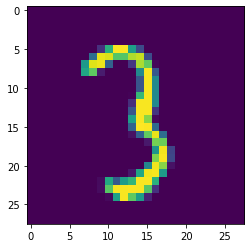

In [7]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'Images','Train',img_name)
img = cv2.imread(filepath,0)
plt.imshow(img)
plt.show()

In [8]:
#print(img)

In [9]:
np.shape(img)

(28, 28)

In [10]:
np.ndim(img)

2

In [11]:
temp = []
for image in train.filename:
    filepath = os.path.join(data_dir,'Images','Train',image)
    img = cv2.imread(filepath,0)
    temp.append(img)

X_train = np.array(temp).reshape(49000,28,28,1)
y_train = list(train['label'])

# DATA AUGMENTATION

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = [0.1,0.2])
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir=os.path.join(data_dir,'Images','Train'), save_prefix='aug', save_format='png'):
    y_train.append(y_batch)

In [12]:
print(len(temp))

49000


In [28]:
x_train = np.array(temp).reshape(-1,28,28,1)

In [21]:
from keras.utils import to_categorical
y_train = to_categorical(train['label'],num_classes = 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [22]:
split_num = int(len(y_train)*0.7)
train_x,val_x = x_train[:split_num],x_train[split_num:]
train_y,val_y = y_train[:split_num],y_train[split_num:]

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_x,train_y,batch_size = 128,epochs = 10,validation_data = (val_x,val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 34s 993us/step - loss: 3.6834 - acc: 0.6998 - val_loss: 0.2496 - val_acc: 0.9369
Epoch 2/10
34300/34300 [==============================] - 34s 995us/step - loss: 0.3806 - acc: 0.8988 - val_loss: 0.1458 - val_acc: 0.9593
Epoch 3/10
34300/34300 [==============================] - 30s 874us/step - loss: 0.2464 - acc: 0.9289 - val_loss: 0.1107 - val_acc: 0.9684
Epoch 4/10
34300/34300 [==============================] - 20s 584us/step - loss: 0.1900 - acc: 0.9441 - val_loss: 0.1022 - val_acc: 0.9728
Epoch 5/10
34300/34300 [==============================] - 19s 568us/step - loss: 0.1596 - acc: 0.9519 - val_loss: 0.0947 - val_acc: 0.9756
Epoch 6/10
34300/34300 [==============================] - 20s 594us/step - loss: 0.1377 - acc: 0.9592 - val_loss: 0.0846 - val_acc: 0.9764
Epoch 7/10
34300/34300 [==============================] - 20s 592us/step - loss: 0.1301 - acc: 0.9616 - val_loss: 0.

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_x,train_y,batch_size = 128,epochs = 10,validation_data = (val_x,val_y))


Train on 34300 samples, validate on 14700 samples
Epoch 1/10
34300/34300 [==============================] - 36s 1ms/step - loss: 0.2665 - acc: 0.9208 - val_loss: 0.0932 - val_acc: 0.9705
Epoch 2/10
34300/34300 [==============================] - 39s 1ms/step - loss: 0.1089 - acc: 0.9665 - val_loss: 0.0681 - val_acc: 0.9790
Epoch 3/10
34300/34300 [==============================] - 62s 2ms/step - loss: 0.0773 - acc: 0.9768 - val_loss: 0.0820 - val_acc: 0.9747
Epoch 4/10
34300/34300 [==============================] - 51s 1ms/step - loss: 0.0657 - acc: 0.9796 - val_loss: 0.0610 - val_acc: 0.9816
Epoch 5/10
34300/34300 [==============================] - 34s 980us/step - loss: 0.0565 - acc: 0.9814 - val_loss: 0.0667 - val_acc: 0.9796
Epoch 6/10
34300/34300 [==============================] - 34s 991us/step - loss: 0.0487 - acc: 0.9842 - val_loss: 0.0592 - val_acc: 0.9825
Epoch 7/10
34300/34300 [==============================] - 33s 969us/step - loss: 0.0467 - acc: 0.9844 - val_loss: 0.0766 - 

In [29]:
split_num1 = int(len(y_train)*0.9)
train1_x,val1_x = x_train[:split_num1],x_train[split_num1:]
train1_y,val1_y = y_train[:split_num1],y_train[split_num1:]

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train1_x,train1_y,batch_size = 128,epochs = 10,validation_data = (val1_x,val1_y))

Train on 44100 samples, validate on 4900 samples
Epoch 1/10
44100/44100 [==============================] - 41s 927us/step - loss: 0.2527 - acc: 0.9244 - val_loss: 0.0945 - val_acc: 0.9694
Epoch 2/10
44100/44100 [==============================] - 40s 898us/step - loss: 0.1034 - acc: 0.9685 - val_loss: 0.0667 - val_acc: 0.9782
Epoch 3/10
44100/44100 [==============================] - 40s 898us/step - loss: 0.0800 - acc: 0.9754 - val_loss: 0.0638 - val_acc: 0.9810
Epoch 4/10
44100/44100 [==============================] - 40s 904us/step - loss: 0.0675 - acc: 0.9783 - val_loss: 0.0576 - val_acc: 0.9829
Epoch 5/10
44100/44100 [==============================] - 39s 894us/step - loss: 0.0583 - acc: 0.9804 - val_loss: 0.0590 - val_acc: 0.9804
Epoch 6/10
44100/44100 [==============================] - 40s 908us/step - loss: 0.0527 - acc: 0.9824 - val_loss: 0.0593 - val_acc: 0.9829
Epoch 7/10
44100/44100 [==============================] - 39s 895us/step - loss: 0.0460 - acc: 0.9850 - val_loss: 0.0